In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Plotting evaluated model

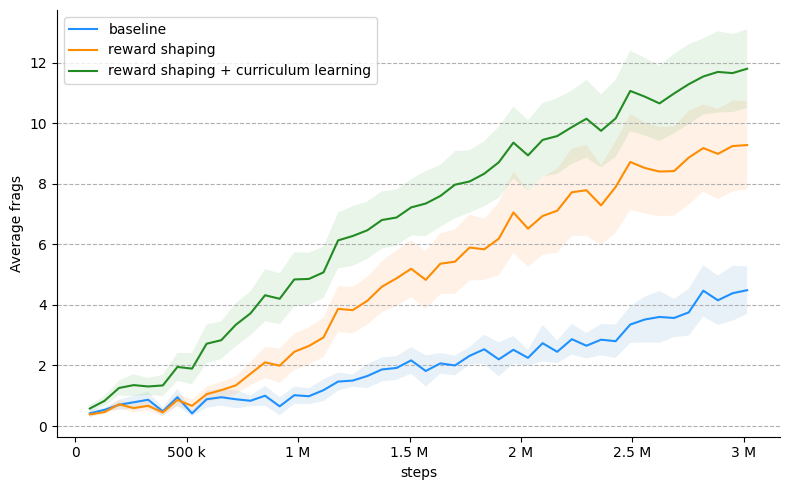

In [11]:
timesteps = None
rewards = [] 

#sns.set_theme()
f, ax = plt.subplots(1, 1, figsize=(8,5), dpi=100)
ticker = matplotlib.ticker.EngFormatter()
ax.xaxis.set_major_formatter(ticker)
ax.xaxis.set_minor_formatter(ticker)
#ax.xaxis.grid(b=True, which='both',  linestyle='-')
ax.yaxis.grid(b=True, which='both',  linestyle='--')
ax.set_xlabel('steps')
ax.set_ylabel('Average frags')
    
colors = ['dodgerblue', 'darkorange', 'forestgreen', 'darkorange']
labels=['baseline', 'reward shaping', 'reward shaping + curriculum learning']

for j, modality in enumerate(['dm_vanilla_{}', 'dm_shaping_{}', 'dm_shaping_curriculum_{}']):

    for i in range(6):
        run_data = np.load('../src/logs/evaluations/' + modality.format(i) + '/evaluations.npz')

        if timesteps is None:
            timesteps = run_data['timesteps']

        rewards.append(np.mean(run_data['frags'], axis=1).squeeze().tolist())

    rs = np.array(rewards)

    y = np.mean(rs, axis=0)
    n = rs.shape[0]
    yerr = np.std(rs, axis=0) / np.sqrt(n)
    ax.plot(timesteps, y, color=colors[j], label=labels[j], linewidth=1.5)
    #ax.errorbar(timesteps, y, yerr,label=labels[j])
    ax.fill_between(timesteps, y + yerr, y - yerr, alpha=0.1)
    
sns.despine()           
plt.legend()
plt.tight_layout()
plt.savefig('./figures/comparison_shaping.png')

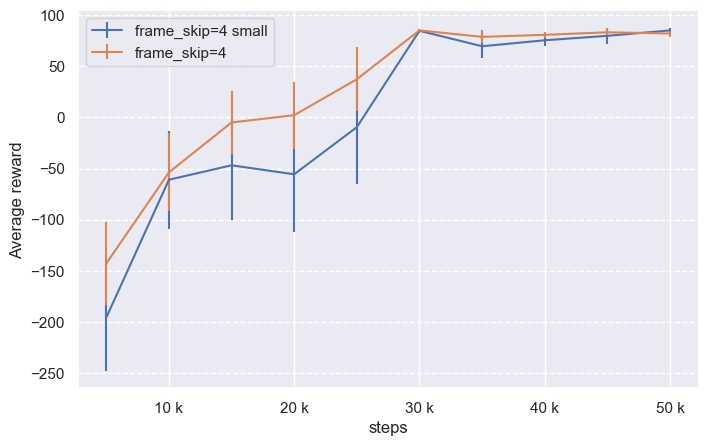

In [13]:
timesteps = None
rewards = [] 

sns.set_theme()
f, ax = plt.subplots(1, 1, figsize=(8,5), dpi=100)
ticker = matplotlib.ticker.EngFormatter()
ax.xaxis.set_major_formatter(ticker)
ax.xaxis.set_minor_formatter(ticker)
#ax.xaxis.grid(b=True, which='both',  linestyle='-')
ax.yaxis.grid(b=True, which='both',  linestyle='--')
ax.set_xlabel('steps')
ax.set_ylabel('Average reward')
    
colors = ['dodgerblue', 'indianred', 'seagreen']
labels=['frame_skip=4 small', 'frame_skip=4']

for j, modality in enumerate(['basic_run_fs=4_small_{}', 'basic_run_{}']):

    for i in range(6):
        run_data = np.load('logs/evaluations/' + modality.format(i) + '/evaluations.npz')

        if timesteps is None:
            timesteps = run_data['timesteps']

        rewards.append(np.mean(run_data['results'], axis=1).squeeze().tolist())

    rs = np.array(rewards)

    y = np.mean(rs, axis=0)
    n = rs.shape[0]
    yerr = np.std(rs, axis=0) / np.sqrt(n)
    ax.errorbar(timesteps, y, yerr,label=labels[j])
    #ax.fill_between(timesteps, y + yerr, y - yerr, alpha=0.1)
    
sns.despine()           
plt.legend()